In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [125]:
# Load Data

In [126]:
cohort_1_w1w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/cohort_1_w1w2.csv')
cohort_1_w1w2.head()

,Unnamed: 0,AcSuppSv,AgeMP,AmIAKN,Asian,Baseline,BlkAfrAm,BudgetSv,CareerSv,CurrFTE,...,Sex,SpecEdSv,St,StFCID,StFIPS,SubAbuse,TribeSv,Wave,Weight,White
0,0,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450290395006,2.0,Yes,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
1,4,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450448396586,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0
2,10,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450540097503,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
3,14,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,1.0,0.0,AK,AK450652098623,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,3.31,1.0
4,17,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,1.0,AK,AK451448406587,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0


In [127]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['CurrenRoll','HighEdCert', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','EdLevlSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','St','DelinqntSv','Wave']]


In [128]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('St')
services_count = services_count.drop('DelinqntSv')



features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Wave,Num_services
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,4
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2


In [129]:
features_2 = features.copy()

features_w2_stDums = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_stDums = features_w2_stDums.drop('Wave', axis = 1)

features_w2_stDums = pd.get_dummies(features_w2_stDums)

features_w2_stDums.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
features_w2_stDums.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'EdLevlSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'DelinqntSv', u'Num_services', u'St_AK', u'St_AL', u'St_AR', u'St_AZ',
       u'St_CA', u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA', u'St_IA',
       u'St_ID', u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD', u'St_ME',
       u'St_MI', u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND', u'St_NE',
       u'St_NH', u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH', u'St_OK',
       u'St_RI', u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT', u'St_WA',
       u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [131]:
features_w2_stDums = features_w2_stDums.drop(['ILNAsv', 'PSEdSuppSv', 'HlthEdSv', u'FamSuppSv', u'MentorSv',\
       'SILsv', 'RmBrdFASv', 'EducFinaSv', 'OthrFinaSv','DelinqntSv'], axis = 1)
features_w2_stDums.head()

,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,Num_services,St_AK,St_AL,St_AR,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,1.0,11.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,0.0,0.0,0.0,0.0,0.0,11.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,0.0,0.0,0.0,0.0,0.0,11.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#  # with num_services and state as one feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_2 = features.copy()

features_w2_stOne = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_stOne = features_w2_stOne.drop('Wave', axis = 1)

features_w2_stOne['St'] = le.fit_transform(features_w2_stOne['St'])

features_w2_stOne.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0,0.0,2


In [133]:
# features_w2_stOne = features_w2_stOne[['St','Num_services','AcSuppSv','CareerSv','DelinqntSv','PSEdSuppSv','EmplyTrSv']]

features_w2_stOne = features_w2_stOne.drop(['ILNAsv', 'PSEdSuppSv', 'HlthEdSv', u'FamSuppSv', u'MentorSv',\
       'SILsv', 'RmBrdFASv', 'EducFinaSv', 'OthrFinaSv','DelinqntSv'], axis = 1)

features_w2_stOne.head()

,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,St,Num_services
7328,0.0,0.0,0.0,0.0,1.0,11.0,0,2
7329,0.0,0.0,0.0,0.0,0.0,11.0,0,1
7330,0.0,0.0,0.0,0.0,0.0,11.0,0,3
7331,0.0,0.0,0.0,0.0,0.0,11.0,0,1
7332,0.0,0.0,0.0,0.0,0.0,11.0,0,2


In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

,CurrenRoll,HighEdCert
7328,2,7
7329,2,5
7330,3,5
7331,2,5
7332,2,5


In [135]:
targets_labels = targets[targets.Wave == "Wave 2: Age 19 Followup"]

targets_labels.HighEdCert.value_counts()

Blank                      2813
High school diploma/GED    2508
None of the above          1705
Declined                     95
Vocational certificate       62
Vocational license           19
Associate's Degree            7
Higher degree                 7
Bachelor's Degree             2
Name: HighEdCert, dtype: int64

In [136]:
targets_w2.HighEdCert.value_counts()

3    2813
5    2508
7    1705
0     110
4      95
8      62
9      19
6       7
1       7
2       2
Name: HighEdCert, dtype: int64

In [137]:
targets_labels.CurrenRoll.value_counts()

Blank       2808
Yes         2447
No          1996
Declined      77
Name: CurrenRoll, dtype: int64

In [138]:
targets_w2.CurrenRoll.value_counts()

0    2808
3    2447
2    1996
1      77
Name: CurrenRoll, dtype: int64

In [139]:
# y = 0 v 1, 
    # where 1 = Vocational certificate (8), Vocational license (9), Associate's Degree (6), 
            #   Higher degree (1), Bachelor's Degree (2)
    # or 1 = when CurrenRoll == 3

def determine_Success(row):
    column_1 = 'HighEdCert'
    column_2 = 'CurrenRoll'
    if row[column_1] == 1:
        val = 1
    elif row[column_1] ==  2:
        val = 1
    elif row[column_1] ==  6:
        val = 1
    elif row[column_1] ==  9:
        val = 1
    elif row[column_1] ==  8:
        val = 1
    elif row[column_2] == 3:
        val = 1
    else:
        val = 0
    return val
    
targets_w2_final = targets_w2.copy()

targets_w2_final['Success'] = targets_w2_final.apply(determine_Success, axis=1)
targets_w2_final.head(10)



,CurrenRoll,HighEdCert,Success
7328,2,7,0
7329,2,5,0
7330,3,5,1
7331,2,5,0
7332,2,5,0
7333,3,7,1
7334,3,7,1
7335,2,5,0
7336,2,7,0
7337,3,7,1


In [140]:
targets_w2_final['Success'].value_counts()

0    4830
1    2498
Name: Success, dtype: int64

In [141]:
targets_w2_final = targets_w2_final.drop(['HighEdCert', 'CurrenRoll'], axis = 1)

In [142]:
all_in_one_dums = pd.concat([targets_w2_final, features_w2_stDums], axis=1, join='inner')
all_in_one_dums.head()

,Success,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,Num_services,St_AK,St_AL,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0,0.0,0.0,0.0,0.0,1.0,11.0,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1,0.0,0.0,0.0,0.0,0.0,11.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,0,0.0,0.0,0.0,0.0,0.0,11.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,0,0.0,0.0,0.0,0.0,0.0,11.0,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
all_in_one_stOne = pd.concat([targets_w2_final, features_w2_stOne], axis=1, join='inner')
all_in_one_stOne.head()

,Success,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,EdLevlSv,St,Num_services
7328,0,0.0,0.0,0.0,0.0,1.0,11.0,0,2
7329,0,0.0,0.0,0.0,0.0,0.0,11.0,0,1
7330,1,0.0,0.0,0.0,0.0,0.0,11.0,0,3
7331,0,0.0,0.0,0.0,0.0,0.0,11.0,0,1
7332,0,0.0,0.0,0.0,0.0,0.0,11.0,0,2


In [144]:
all_in_one_stOne.columns

Index([u'Success', u'AcSuppSv', u'CareerSv', u'EmplyTrSv', u'BudgetSv',
       u'HousEdSv', u'EdLevlSv', u'St', u'Num_services'],
      dtype='object')

In [145]:
all_in_one_dums.columns

Index([u'Success', u'AcSuppSv', u'CareerSv', u'EmplyTrSv', u'BudgetSv',
       u'HousEdSv', u'EdLevlSv', u'Num_services', u'St_AK', u'St_AL', u'St_AR',
       u'St_AZ', u'St_CA', u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA',
       u'St_IA', u'St_ID', u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD',
       u'St_ME', u'St_MI', u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND',
       u'St_NE', u'St_NH', u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH',
       u'St_OK', u'St_RI', u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT',
       u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

### Just States

In [146]:
St_One = all_in_one_stOne[['St', 'Success']] 


In [147]:
St_One.columns

Index([u'St', u'Success'], dtype='object')

In [148]:
St_Dums = all_in_one_dums.drop(['AcSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv', 'EdLevlSv','Num_services'], axis = 1)

In [149]:
St_Dums.columns

Index([u'Success', u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA', u'St_CO',
       u'St_DC', u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID', u'St_IL',
       u'St_KS', u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI', u'St_MN',
       u'St_MO', u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH', u'St_NJ',
       u'St_NM', u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI', u'St_SC',
       u'St_SD', u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI', u'St_WV',
       u'St_WY'],
      dtype='object')

# Functions for Models

In [150]:
## And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

In [151]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

In [152]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for Positive Education Outcome', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

# Models for X1: Features with State as one var

In [153]:
X = St_Dums.drop('Success', axis = 1)
y = St_Dums['Success']

In [30]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


all_models = {}

In [31]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[1036  413]
 [ 424  326]]
             precision    recall  f1-score   support

          0       0.71      0.71      0.71      1449
          1       0.44      0.43      0.44       750

avg / total       0.62      0.62      0.62      2199



In [32]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [33]:
gsknn.fit(X, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
gsknn.best_params_


{'n_neighbors': 55}

In [35]:
gsknn.best_score_

0.67003275109170302

In [36]:
evaluate_model(gsknn.best_estimator_)


[[1132  317]
 [ 443  307]]
             precision    recall  f1-score   support

          0       0.72      0.78      0.75      1449
          1       0.49      0.41      0.45       750

avg / total       0.64      0.65      0.65      2199



0.6543883583447021

In [37]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

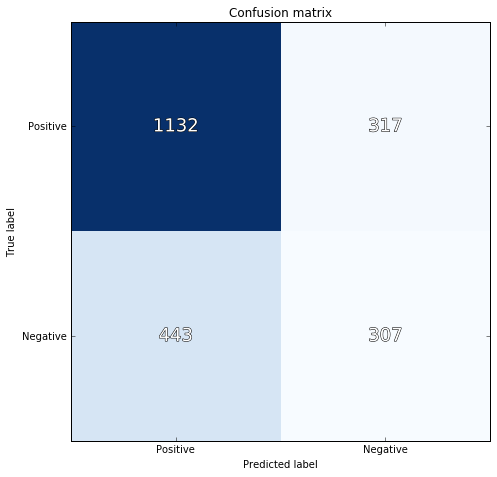

In [38]:
preds = gsknn.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

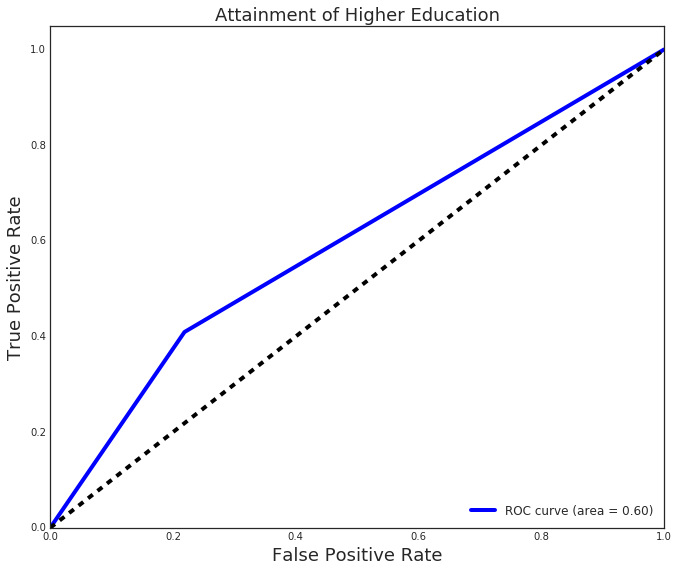

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [41]:
evaluate_model(baggingknn)


[[1064  385]
 [ 383  367]]
             precision    recall  f1-score   support

          0       0.74      0.73      0.73      1449
          1       0.49      0.49      0.49       750

avg / total       0.65      0.65      0.65      2199



0.65075034106412011

In [42]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [43]:
gsbaggingknn.fit(X, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [44]:
gsbaggingknn.best_params_

{'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 20}

In [45]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}


[[1423   26]
 [ 714   36]]
             precision    recall  f1-score   support

          0       0.67      0.98      0.79      1449
          1       0.58      0.05      0.09       750

avg / total       0.64      0.66      0.55      2199



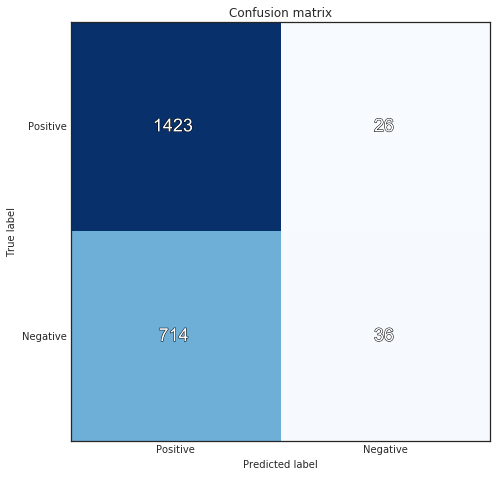

In [46]:
preds = gsbaggingknn.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)


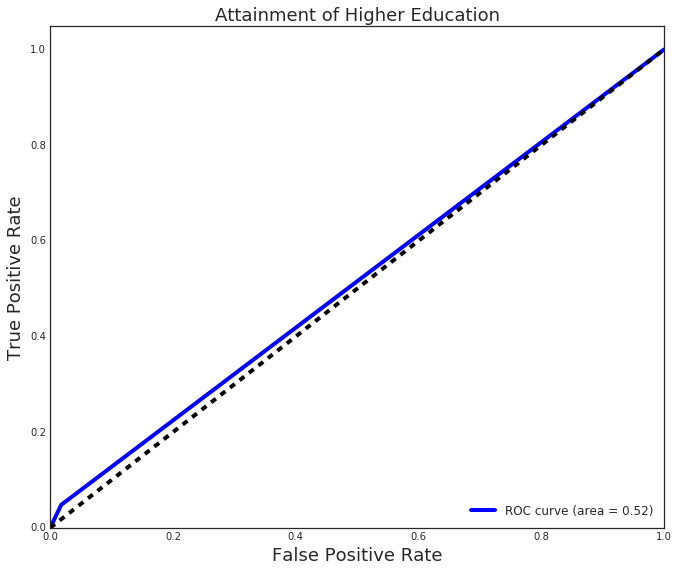

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199



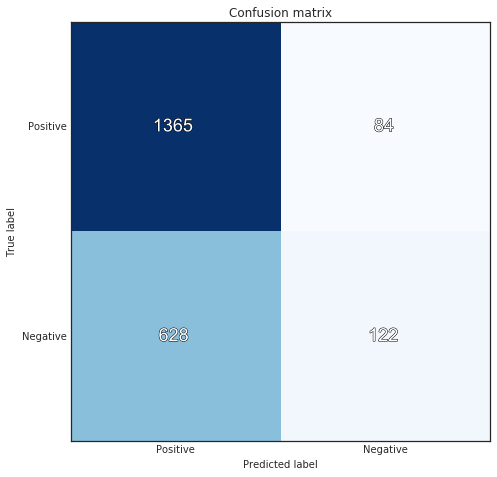

In [49]:
preds = lr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

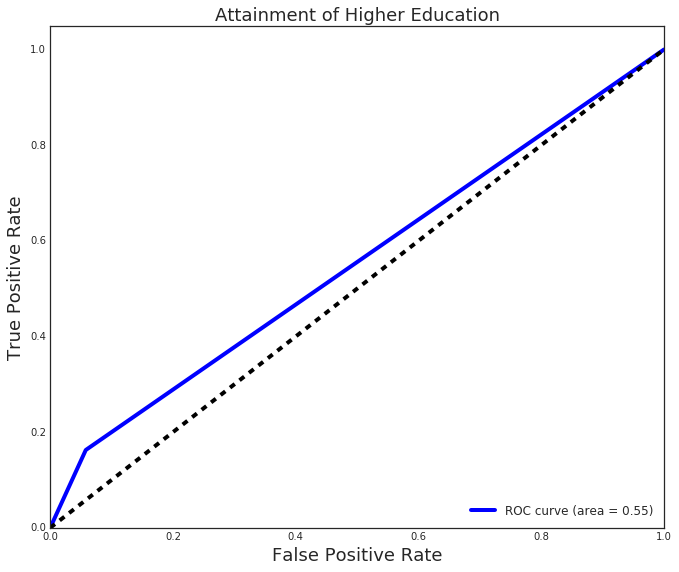

In [50]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [51]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 0.1}
0.666484716157
[[1389   60]
 [ 661   89]]
             precision    recall  f1-score   support

          0       0.68      0.96      0.79      1449
          1       0.60      0.12      0.20       750

avg / total       0.65      0.67      0.59      2199



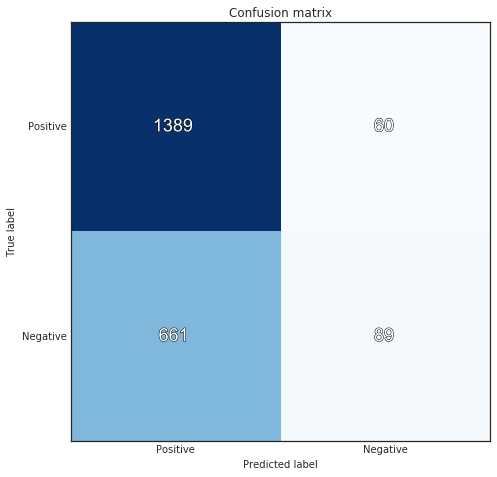

In [52]:
preds = gslr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

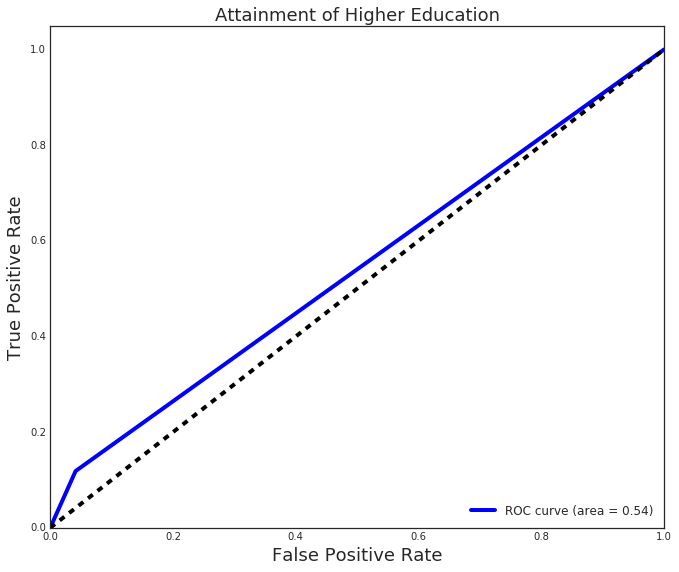

In [53]:
Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [54]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.669350436681
[[1429   20]
 [ 721   29]]
             precision    recall  f1-score   support

          0       0.66      0.99      0.79      1449
          1       0.59      0.04      0.07       750

avg / total       0.64      0.66      0.55      2199



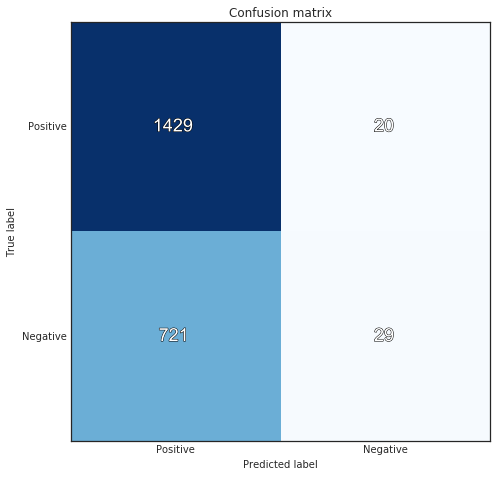

In [55]:
preds = gsbagginglr.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

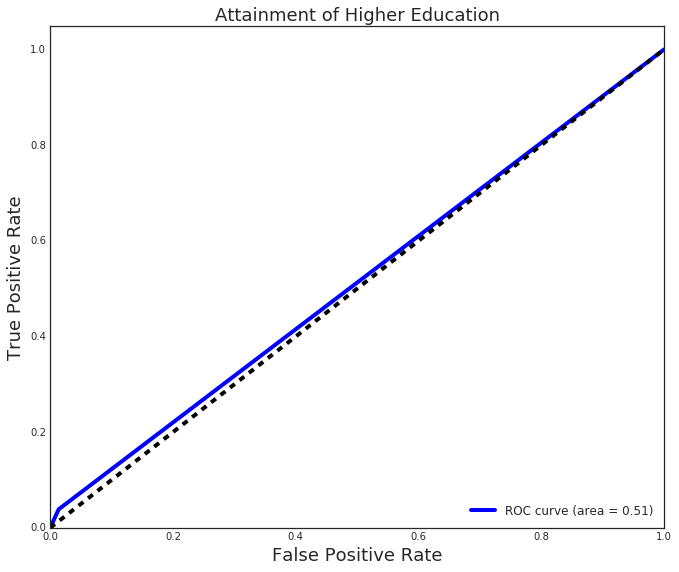

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199



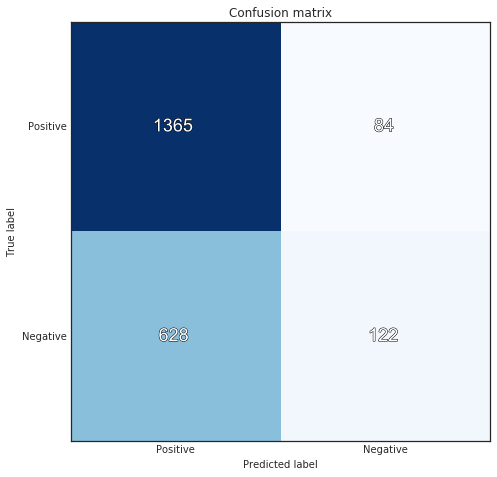

In [58]:
preds = dt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

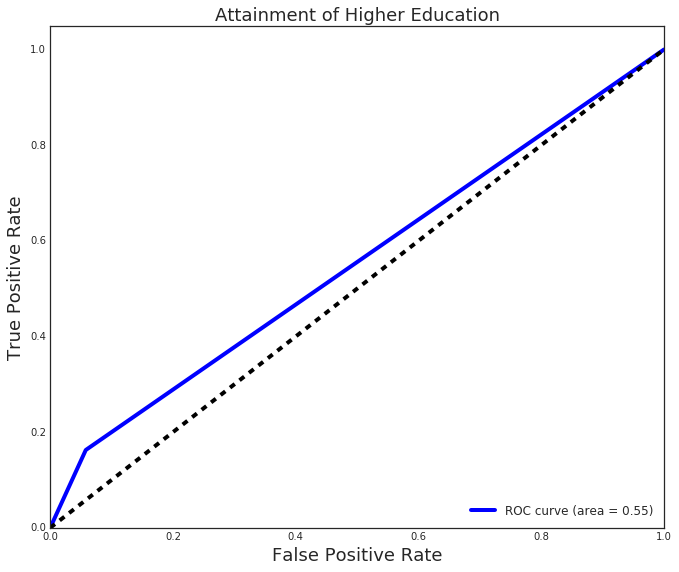

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [60]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.671260917031
[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199



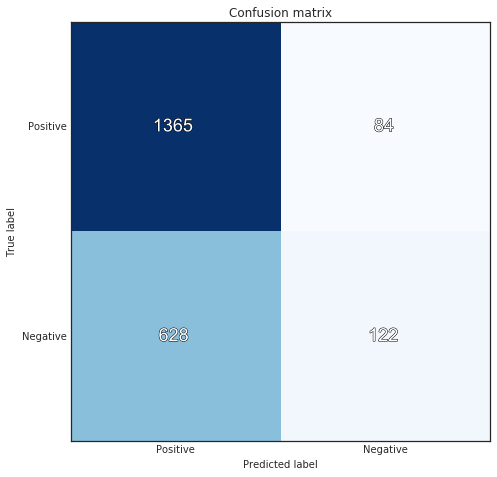

In [61]:
preds = gsdt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

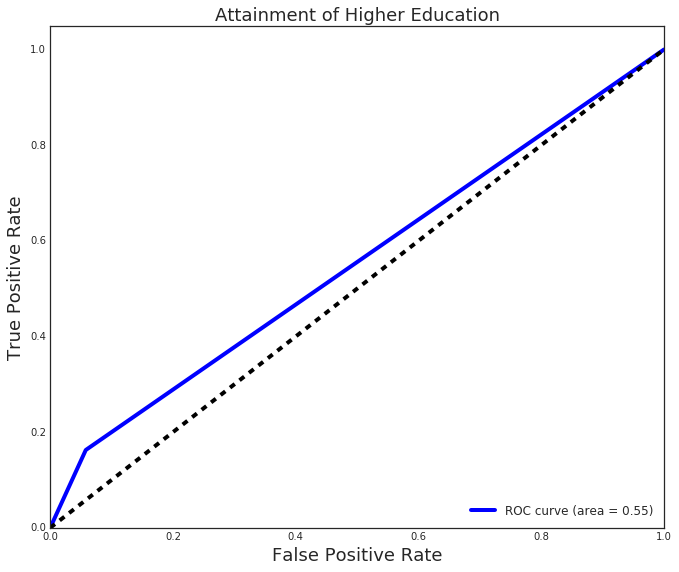

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [63]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': False}
0.669077510917
[[1357   92]
 [ 620  130]]
             precision    recall  f1-score   support

          0       0.69      0.94      0.79      1449
          1       0.59      0.17      0.27       750

avg / total       0.65      0.68      0.61      2199



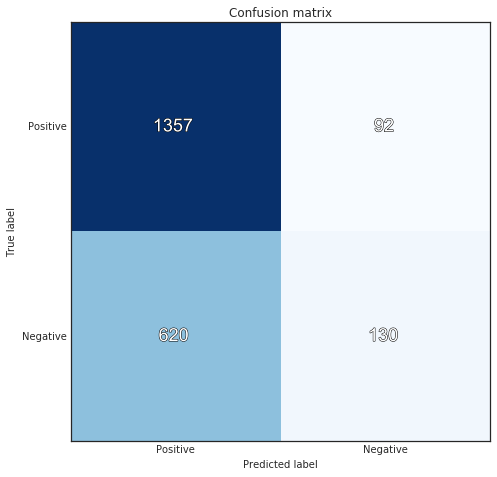

In [64]:
preds = gsbaggingdt.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

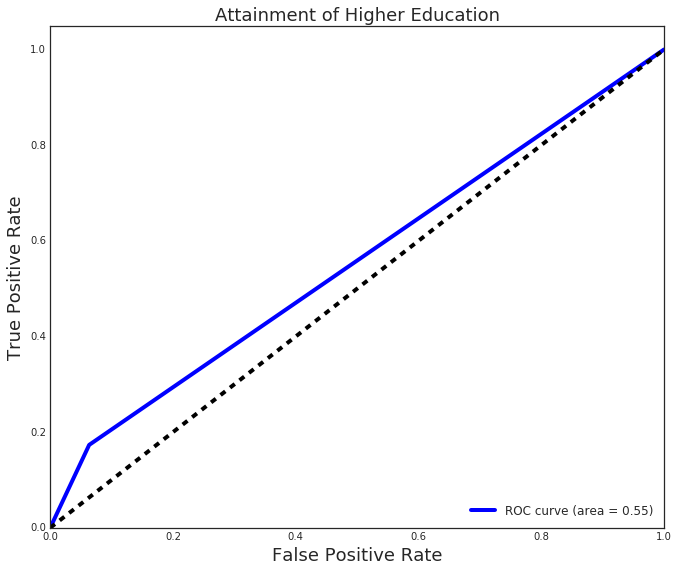

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [66]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[1389   60]
 [ 661   89]]
             precision    recall  f1-score   support

          0       0.68      0.96      0.79      1449
          1       0.60      0.12      0.20       750

avg / total       0.65      0.67      0.59      2199



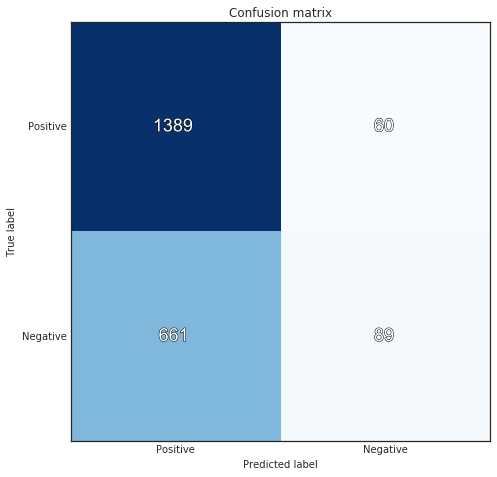

In [67]:
preds = svm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

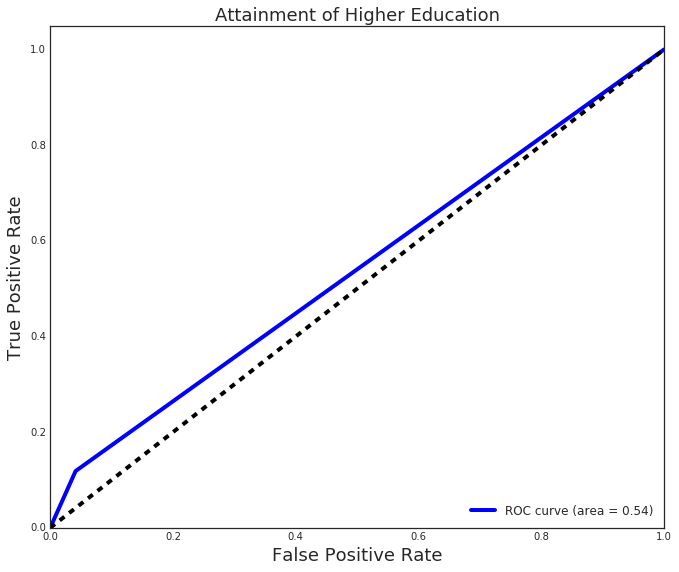

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [69]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'rbf', 'C': 1.0, 'gamma': 0.1}
0.670715065502
[[1370   79]
 [ 636  114]]
             precision    recall  f1-score   support

          0       0.68      0.95      0.79      1449
          1       0.59      0.15      0.24       750

avg / total       0.65      0.67      0.61      2199



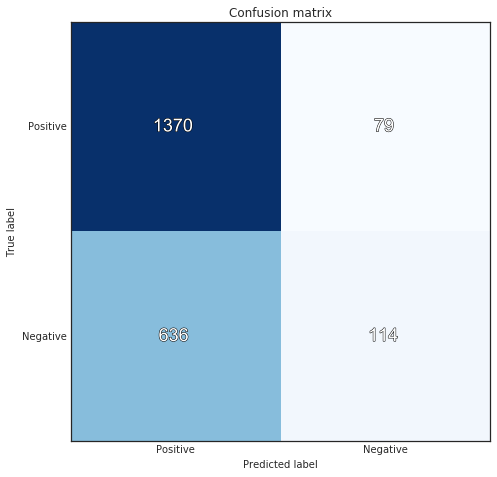

In [70]:
preds = gssvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

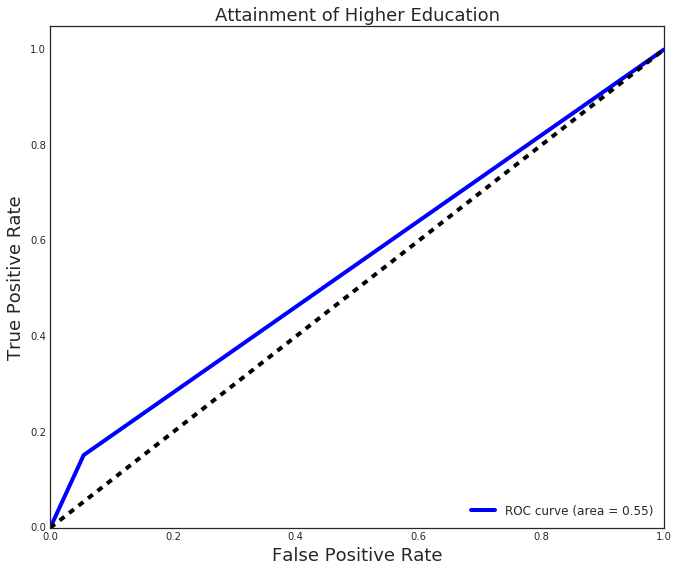

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [72]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.670305676856
[[1370   79]
 [ 636  114]]
             precision    recall  f1-score   support

          0       0.68      0.95      0.79      1449
          1       0.59      0.15      0.24       750

avg / total       0.65      0.67      0.61      2199



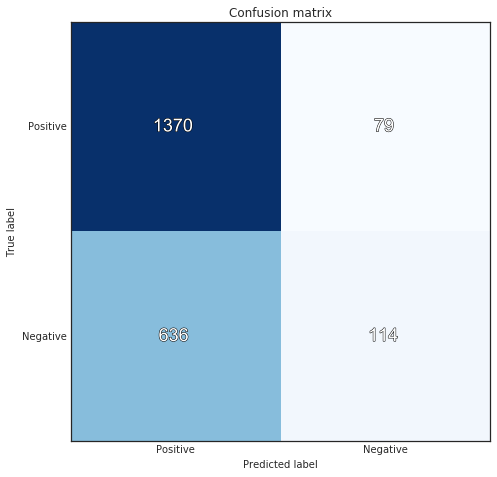

In [73]:
preds = gsbaggingsvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

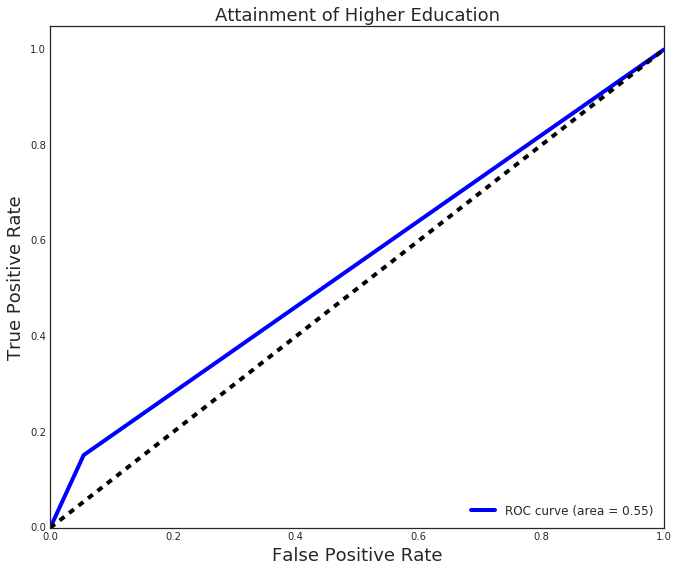

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199

[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199



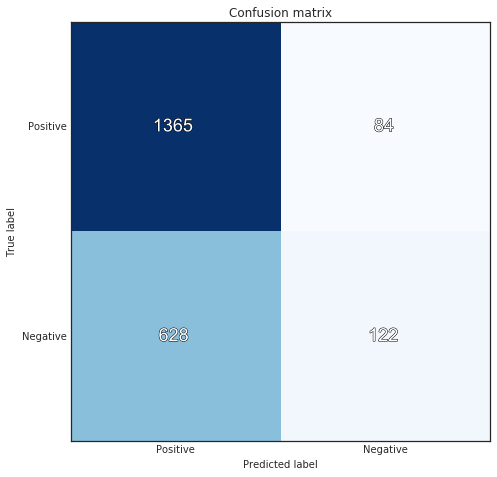

In [76]:
preds = rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

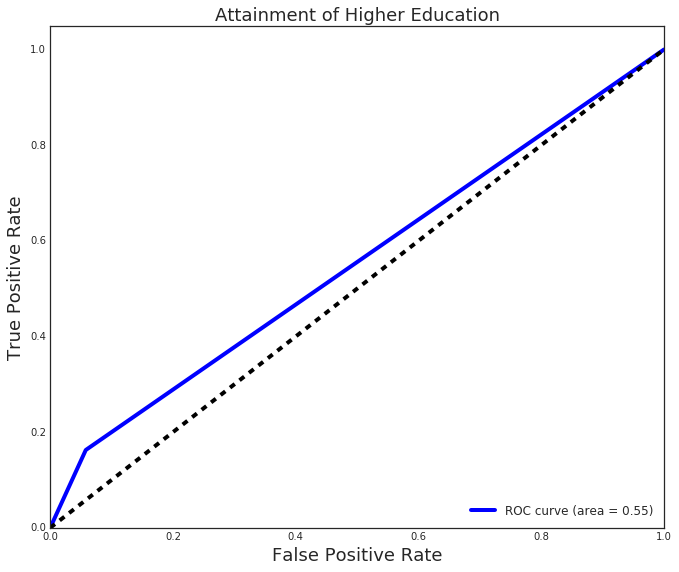

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

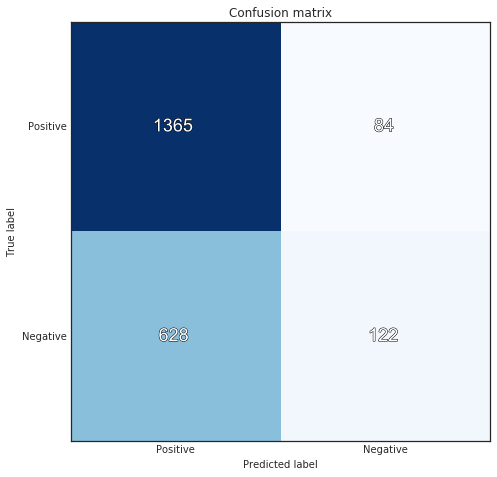

In [78]:
preds = et.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

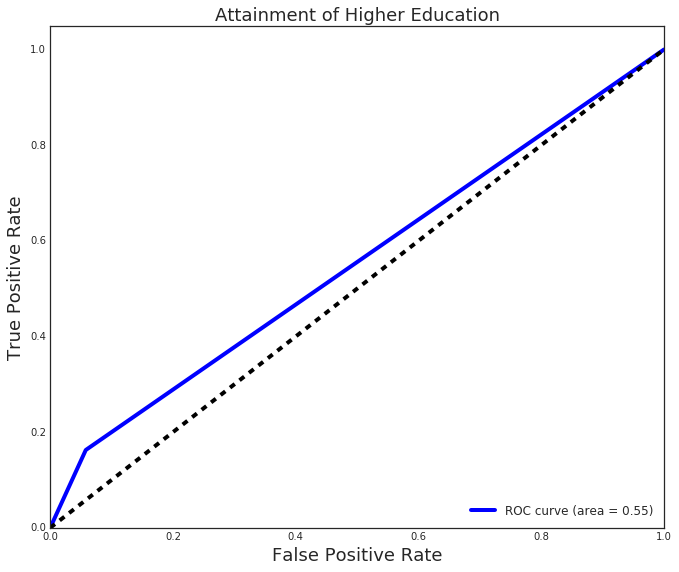

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [80]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 3, 'criterion': 'gini', 'max_depth': None, 'class_weight': None}
0.671670305677
[[1339  110]
 [ 604  146]]
             precision    recall  f1-score   support

          0       0.69      0.92      0.79      1449
          1       0.57      0.19      0.29       750

avg / total       0.65      0.68      0.62      2199



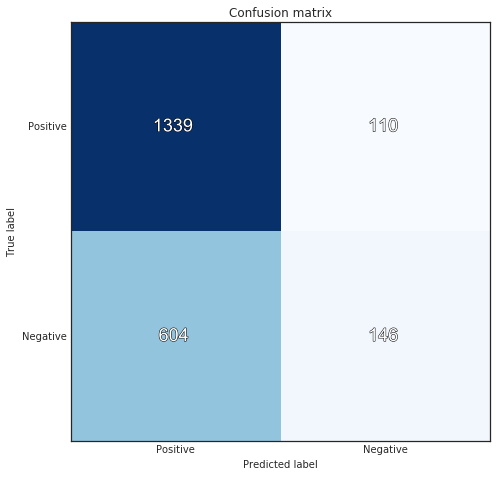

In [81]:
preds = gsrf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

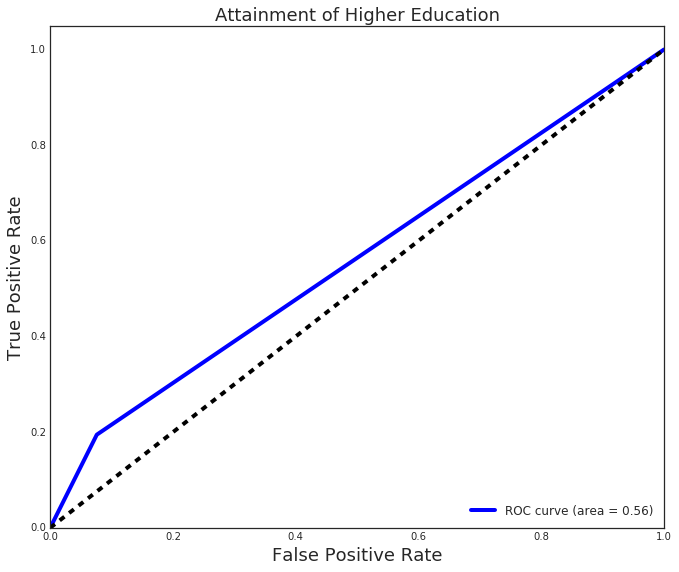

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [83]:
gset = GridSearchCV(ExtraTreesClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 3, 'criterion': 'gini', 'max_depth': None, 'class_weight': None}
0.669486899563
[[1365   84]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.94      0.79      1449
          1       0.59      0.16      0.26       750

avg / total       0.65      0.68      0.61      2199



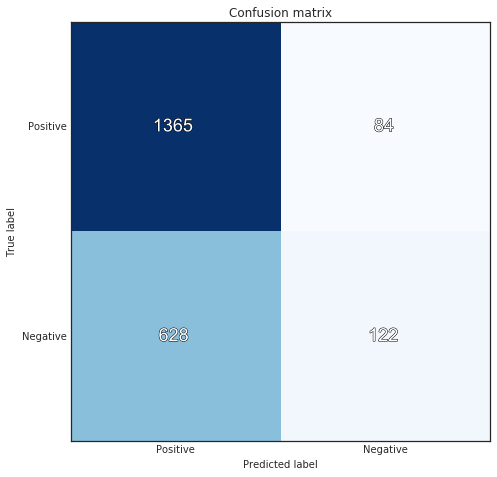

In [84]:
preds = gset.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

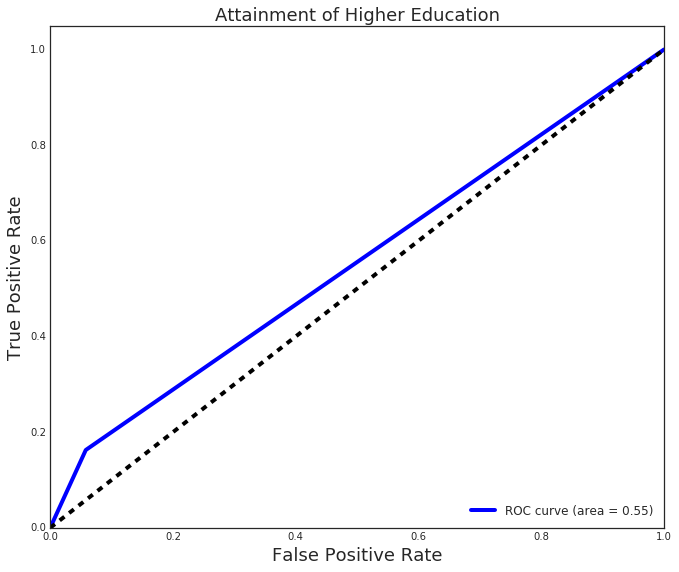

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = preds

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Attainment of Higher Education', fontsize=18)
plt.legend(loc="lower right")
plt.show()

,score
model,
et,0.676216
rf,0.676216
gsbaggingdt,0.676216
gsdt,0.676216
lr,0.676216
gset,0.676216
dt,0.676216
gsrf,0.675307
gsbaggingsvm,0.674852


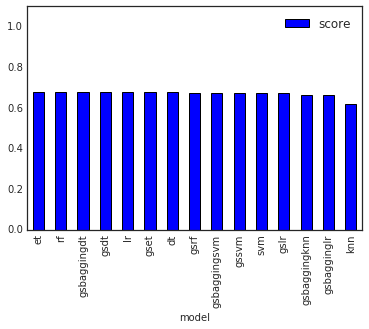

In [86]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.0, 1.1)

scores

In [87]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres

knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


,score,error
model,,
et,0.671533,0.009705
gsbaggingdt,0.671124,0.002734
knn,0.670169,0.003372
gsdt,0.670034,0.006037
rf,0.669759,0.005374
lr,0.669487,0.004352
gssvm,0.668805,0.001812
dt,0.668804,0.001267
gsbaggingsvm,0.668532,0.002677


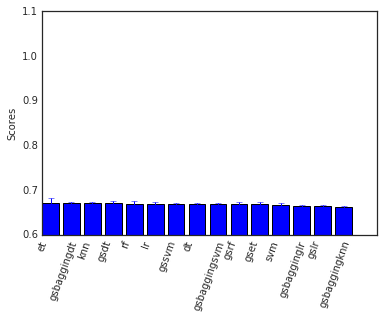

In [88]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

# cvscores.to_csv('../../../5.2-lesson/assets/datasets/car_evaluation/model_comparison.csv')
cvscores

In [90]:
X.columns

Index([u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA', u'St_CO', u'St_DC',
       u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID', u'St_IL', u'St_KS',
       u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI', u'St_MN', u'St_MO',
       u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH', u'St_NJ', u'St_NM',
       u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI', u'St_SC', u'St_SD',
       u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [ ]:
DO LOGISTIC REGRESSION TO GET COEFFICIENTS

In [154]:

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, stratify=y.values,random_state=77)

logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [155]:
# Get the predicted probability vector
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['Negative','Positive'])
print(Y_pp.iloc[0:10])
print(len(X_test), len(Y_pp))

   Negative  Positive
0  0.665086  0.334914
1  0.557218  0.442782
2  0.588264  0.411736
3  0.557218  0.442782
4  0.867818  0.132182
5  0.801772  0.198228
6  0.587740  0.412260
7  0.747456  0.252544
8  0.706286  0.293714
9  0.890973  0.109027
(2419, 2419)


In [156]:
Y_pp['pred_class_success'] = Y_pred
print(Y_pp.iloc[0:10])

   Negative  Positive  pred_class_success
0  0.665086  0.334914                   0
1  0.557218  0.442782                   0
2  0.588264  0.411736                   0
3  0.557218  0.442782                   0
4  0.867818  0.132182                   0
5  0.801772  0.198228                   0
6  0.587740  0.412260                   0
7  0.747456  0.252544                   0
8  0.706286  0.293714                   0
9  0.890973  0.109027                   0


In [157]:
Y_pp

,Negative,Positive,pred_class_success
0,0.665086,0.334914,0
1,0.557218,0.442782,0
2,0.588264,0.411736,0
3,0.557218,0.442782,0
4,0.867818,0.132182,0
5,0.801772,0.198228,0
6,0.587740,0.412260,0
7,0.747456,0.252544,0
8,0.706286,0.293714,0
9,0.890973,0.109027,0


In [158]:
conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['Positive', 'Negative'],
                         columns=['predicted_Positive','predicted_Negative'])

print(confusion)

          predicted_Positive  predicted_Negative
Positive                 128                 697
Negative                 110                1484


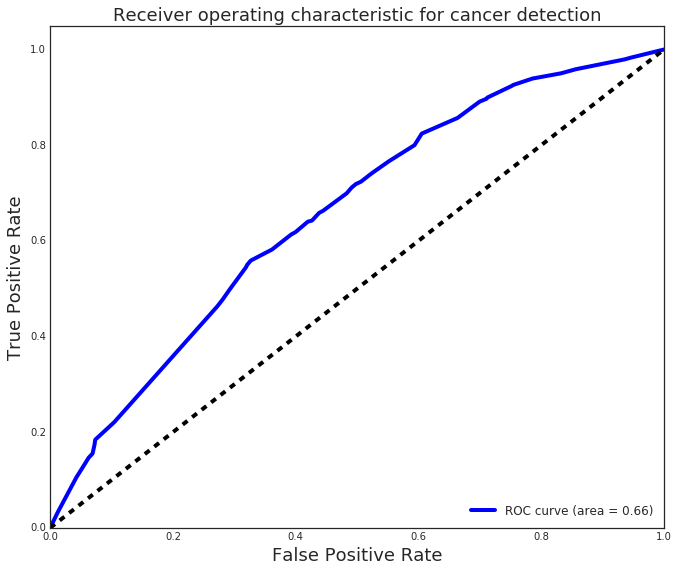

In [159]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [160]:
logreg.coef_

array([[-0.26596999,  0.55246049, -0.18906398,  0.09215489,  0.48633901,
        -0.18924513,  0.50097019, -0.0658322 ,  1.00384612, -0.3688702 ,
        -1.16558473, -0.08027196, -1.06888398, -0.25242082, -1.38449831,
        -0.64294062,  0.98723479, -0.16119391,  1.20128531,  0.15068319,
         0.35942296,  0.35842697,  0.36158867, -0.45628395, -0.46817626,
         0.25315281,  0.75686316,  0.13081234,  0.77127605,  0.03017315,
         0.12961351,  0.20671763,  0.38215529,  0.50070942,  0.15157125,
        -0.47181786,  0.19875684, -0.26596999, -0.36914479, -0.68118585,
        -1.1932411 , -0.54183592]])

In [161]:
logreg.n_iter_

array([5], dtype=int32)

In [169]:
all_in_one_stOne.St.value_counts()

4     1429
10     463
9      363
14     342
8      313
33     284
29     282
13     274
20     271
39     263
38     233
35     222
5      216
31     212
36     204
15     162
19     160
18     140
22     138
12     129
2      125
16     104
32      83
28      82
30      81
7       71
34      67
23      63
1       58
17      55
3       52
25      49
0       46
11      43
26      41
6       39
37      39
40      36
27      35
21      30
41      23
24       6
Name: St, dtype: int64

In [186]:

features_2 = features.copy()

features_w2_stOne = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_stOne = features_w2_stOne.drop('Wave', axis = 1)

features_w2_stOne.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,EdLevlSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,1.0,AK,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,AK,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,AK,0.0,2


In [187]:
all_in_one_stOne = pd.concat([targets_w2_final, features_w2_stOne], axis=1, join='inner')
St_One = all_in_one_stOne[['St', 'Success']] 
St_One.head()

,St,Success
7328,AK,0
7329,AK,0
7330,AK,1
7331,AK,0
7332,AK,0


In [ ]:
St_One.St.value_counts()

In [188]:

# reserve the first cell, to import all dependencies (python classes)
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [189]:
y, X = dmatrices('Success ~ C(St)', St_One, return_type = 'dataframe')
X.head()

,Intercept,C(St)[T.AL],C(St)[T.AR],C(St)[T.AZ],C(St)[T.CA],C(St)[T.CO],C(St)[T.DC],C(St)[T.DE],C(St)[T.FL],C(St)[T.GA],...,C(St)[T.RI],C(St)[T.SC],C(St)[T.SD],C(St)[T.UT],C(St)[T.VA],C(St)[T.VT],C(St)[T.WA],C(St)[T.WI],C(St)[T.WV],C(St)[T.WY]
7328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
# #Obtain the first 10 features, which are the mean figures in the dataset
# data_df   = X
# target_df = y

In [185]:

# #Convert DataFrame to Numpy Array
# x = X.as_matrix(columns=None)
# y = y.as_matrix(columns=None)

In [190]:
### specify the model
mdl = sm.MNLogit(y, X)
mdl_fit = mdl.fit()

Optimization terminated successfully.
         Current function value: 0.600156
         Iterations 6


/Users/cguy/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:130: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  endog_dummies = get_dummies(endog.icol(0))


In [191]:
### print model summary ###
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                Success   No. Observations:                 7328
Model:                        MNLogit   Df Residuals:                     7286
Method:                           MLE   Df Model:                           41
Date:                Fri, 26 Aug 2016   Pseudo R-squ.:                 0.06462
Time:                        10:49:05   Log-Likelihood:                -4397.9
converged:                       True   LL-Null:                       -4701.8
                                        LLR p-value:                5.578e-102
===============================================================================
  Success=1       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3514      0.299     -1.173      0.241        -0.938     0.236
C(St)[T.AL]     0.6290      0.400      1.573      0.116        -0.155     1.413
C(St)[T.AR]    -0.4769      0.357     -1.336      0.182        -1.177     0.223
C(St)[T.AZ]    -0.3707      0.421     -0.881      0.378        -1.195     0.454
C(St)[T.CA]     0.1024      0.304      0.337      0.736        -0.494     0.699
C(St)[T.CO]    -0.5136      0.334     -1.536      0.125        -1.169     0.142
C(St)[T.DC]     0.6092      0.440      1.383      0.167        -0.254     1.472
C(St)[T.DE]    -0.2584      0.389     -0.664      0.507        -1.021     0.504
C(St)[T.FL]     0.6279      0.320      1.959      0.050        -0.000     1.256
C(St)[T.GA]    -0.7880      0.324     -2.436      0.015        -1.422    -0.154
C(St)[T.IA]    -1.5920      0.331     -4.814      0.000        -2.240    -0.944
C(St)[T.ID]    -0.3768      0.442     -0.852      0.394        -1.244     0.490
C(St)[T.IL]    -1.4678      0.393     -3.737      0.000        -2.237    -0.698
C(St)[T.KS]    -0.5880      0.328     -1.791      0.073        -1.231     0.055
C(St)[T.LA]    -1.6988      0.344     -4.933      0.000        -2.374    -1.024
C(St)[T.MA]    -1.0898      0.360     -3.028      0.002        -1.795    -0.384
C(St)[T.MD]     0.5832      0.359      1.626      0.104        -0.120     1.286
C(St)[T.ME]    -0.6294      0.426     -1.478      0.139        -1.464     0.205
C(St)[T.MI]     0.8168      0.346      2.360      0.018         0.138     1.495
C(St)[T.MN]    -0.2131      0.342     -0.624      0.533        -0.883     0.456
C(St)[T.MO]     0.0766      0.324      0.237      0.813        -0.558     0.711
C(St)[T.MT]     0.2179      0.473      0.461      0.645        -0.709     1.145
C(St)[T.NC]     0.0890      0.345      0.258      0.796        -0.588     0.766
C(St)[T.ND]    -0.9014      0.426     -2.116      0.034        -1.736    -0.066
C(St)[T.NE]    -0.3417      0.916     -0.373      0.709        -2.138     1.454
C(St)[T.NH]    -0.0202      0.417     -0.048      0.961        -0.838     0.798
C(St)[T.NJ]     0.3026      0.433      0.699      0.484        -0.546     1.151
C(St)[T.NM]    -0.5649      0.479     -1.179      0.239        -1.504     0.374
C(St)[T.NV]     0.4490      0.372      1.206      0.228        -0.281     1.179
C(St)[T.NY]    -0.3417      0.325     -1.052      0.293        -0.979     0.295
C(St)[T.OH]    -0.1266      0.377     -0.336      0.737        -0.865     0.612
C(St)[T.OK]    -0.3347      0.333     -1.005      0.315        -0.987     0.318
C(St)[T.RI]     0.0848      0.372      0.228      0.820        -0.645     0.815
C(St)[T.SC]     0.0678      0.323      0.210      0.833        -0.564     0.700
C(St)[T.SD]    -0.2973      0.395     -0.753      0.451        -1.071     0.477
C(St)[T.UT]    -0.8332      0.339     -2.459      0.014        -1.497    -0.169
C(St)[T.VA]    -0.2121      0.333     -0.637      0.524        -0.865     0.441
C(St)[T.VT]    -0.3417      0.453     -0.

In [192]:
### aic and bic ###
print(mdl_fit.aic)
print(mdl_fit.bic)

8879.88294049
9169.66017256


In [193]:
### marginal effects ###
mdl_margeff = mdl_fit.get_margeff()
print( mdl_margeff.summary() )

       MNLogit Marginal Effects      
Dep. Variable:                Success
Method:                          dydx
At:                           overall
  Success=0      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
C(St)[T.AL]    -0.1302      0.083     -1.574      0.116        -0.292     0.032
C(St)[T.AR]     0.0987      0.074      1.336      0.181        -0.046     0.244
C(St)[T.AZ]     0.0768      0.087      0.881      0.378        -0.094     0.247
C(St)[T.CA]    -0.0212      0.063     -0.337      0.736        -0.145     0.102
C(St)[T.CO]     0.1063      0.069      1.536      0.124        -0.029     0.242
C(St)[T.DC]    -0.1261      0.091     -1.384      0.166        -0.305     0.052
C(St)[T.DE]     0.0535      0.081      0.664      0.507        -0.104     0.211
C(St)[T.FL]    -0.1300      0.066     -1.962      0.050        -0.260    -0.000
C(St)[T.GA]     0.1632      0.067      2.439    